<a href="https://colab.research.google.com/github/hamza7771/Hamza_qureshi_quater2_assignment/blob/main/flower_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd /content/drive/MyDrive/flowers/

/content/drive/MyDrive/flowers


In [14]:
import os
print(os.listdir('../flowers'))

['sunflower', 'flowers', 'tulip', 'rose', 'daisy', 'dandelion', 'folwer_prediction_shukat_sir.ipynb']


In [16]:

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
#Using TensorFlow backend.


In [17]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='./daisy'
FLOWER_SUNFLOWER_DIR='./sunflower'
FLOWER_TULIP_DIR='./tulip'
FLOWER_DANDI_DIR='./dandelion'
FLOWER_ROSE_DIR='./rose'



In [18]:
def assign_label(img,flower_type):
    return flower_type

In [19]:



def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
 

In [20]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))




  0%|          | 0/770 [00:00<?, ?it/s]

  2%|▏         | 16/770 [00:00<00:04, 152.10it/s]

  4%|▍         | 31/770 [00:00<00:05, 147.77it/s]

  6%|▌         | 46/770 [00:00<00:04, 145.39it/s]

  8%|▊         | 63/770 [00:00<00:04, 151.17it/s]

 11%|█         | 84/770 [00:00<00:04, 164.11it/s]

 13%|█▎        | 103/770 [00:00<00:03, 169.29it/s]

 16%|█▌        | 121/770 [00:00<00:03, 170.32it/s]

 18%|█▊        | 141/770 [00:00<00:03, 177.63it/s]

 21%|██        | 160/770 [00:00<00:03, 180.61it/s]

 23%|██▎       | 180/770 [00:01<00:03, 183.29it/s]

 26%|██▌       | 199/770 [00:01<00:03, 185.02it/s]

 28%|██▊       | 218/770 [00:01<00:03, 177.03it/s]

 31%|███       | 238/770 [00:01<00:02, 181.33it/s]

 34%|███▎      | 258/770 [00:01<00:02, 183.80it/s]

 36%|███▌      | 277/770 [00:01<00:02, 182.19it/s]

 39%|███▉      | 300/770 [00:01<00:02, 191.29it/s]

 42%|████▏     | 325/770 [00:01<00:02, 204.38it/s]

 45%|████▌     | 349/770 [00:01<00:01, 212.35it/s]

 48%|████▊     | 373/770 [

error: ignored

In [21]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))



make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))





  0%|          | 0/379 [00:00<?, ?it/s]


  0%|          | 1/379 [00:00<00:49,  7.64it/s]


  1%|          | 2/379 [00:00<00:54,  6.87it/s]


  1%|          | 3/379 [00:00<01:07,  5.55it/s]


  1%|          | 4/379 [00:00<01:15,  4.96it/s]


  1%|▏         | 5/379 [00:00<01:06,  5.60it/s]


  2%|▏         | 6/379 [00:01<01:03,  5.86it/s]


  2%|▏         | 7/379 [00:01<01:00,  6.20it/s]


  2%|▏         | 8/379 [00:01<01:03,  5.83it/s]


  2%|▏         | 9/379 [00:01<01:11,  5.16it/s]


  3%|▎         | 10/379 [00:01<01:13,  5.05it/s]


  3%|▎         | 11/379 [00:02<01:11,  5.12it/s]


  3%|▎         | 12/379 [00:02<01:23,  4.38it/s]


  3%|▎         | 13/379 [00:02<01:20,  4.55it/s]


  4%|▎         | 14/379 [00:02<01:17,  4.74it/s]


  4%|▍         | 15/379 [00:02<01:10,  5.17it/s]


  4%|▍         | 16/379 [00:03<01:18,  4.60it/s]


  4%|▍         | 17/379 [00:03<01:09,  5.24it/s]


  5%|▍         | 18/379 [00:03<01:07,  5.38it/s]


  5%|▌         | 19/379 [00:03<01:37,  3.71it/

1148





  0%|          | 2/984 [00:00<03:22,  4.85it/s]


  0%|          | 3/984 [00:00<04:35,  3.56it/s]


  0%|          | 4/984 [00:01<03:54,  4.18it/s]


  1%|          | 5/984 [00:01<03:25,  4.75it/s]


  1%|          | 6/984 [00:01<03:06,  5.24it/s]


  1%|          | 7/984 [00:01<02:53,  5.64it/s]


  1%|          | 8/984 [00:01<02:50,  5.74it/s]


  1%|          | 9/984 [00:01<02:54,  5.58it/s]


  1%|          | 10/984 [00:02<03:03,  5.30it/s]


  1%|          | 11/984 [00:02<03:16,  4.95it/s]


  1%|          | 12/984 [00:02<03:30,  4.62it/s]


  1%|▏         | 13/984 [00:02<03:01,  5.35it/s]


  1%|▏         | 14/984 [00:02<02:57,  5.48it/s]


  2%|▏         | 15/984 [00:02<02:48,  5.74it/s]


  2%|▏         | 16/984 [00:03<02:33,  6.30it/s]


  2%|▏         | 17/984 [00:03<02:28,  6.52it/s]


  2%|▏         | 18/984 [00:03<02:52,  5.58it/s]


  2%|▏         | 19/984 [00:03<02:53,  5.56it/s]


  2%|▏         | 20/984 [00:03<02:56,  5.47it/s]


  2%|▏         | 21/984 [00:04<03:00

2132


In [11]:

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))




 30%|███       | 316/1052 [01:01<02:33,  4.79it/s]

KeyboardInterrupt: ignored

In [20]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))


100%|██████████| 784/784 [00:04<00:00, 166.91it/s]

3799


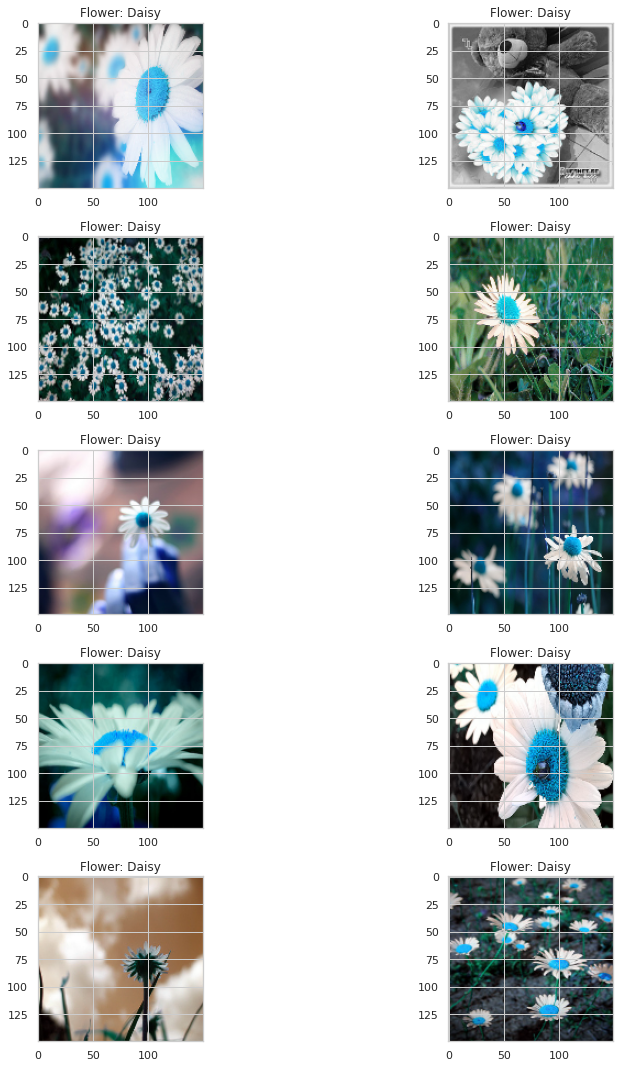

In [9]:

# Visualizing some Random Images
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()


In [22]:
# Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255


In [23]:

# Splitting into Training and Validation Sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
# Setting the Random Seeds
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


In [25]:
# Modelling
# Building the ConvNet Model
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))


In [36]:

# Using a LR Annealer
batch_size=60
epochs=5

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)


In [26]:
# Data Augmentation to prevent Overfitting
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images



In [27]:
datagen.fit(x_train)


In [28]:

# Compiling the Keras Model & Summary
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [32]:
# Fitting on the Training set and making predcitons on the Validation set
batch_size=128
epochs=5

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))


Epoch 1/5
12/12 [==============================] - 88s 7s/step - loss: 1.2215 - accuracy: 0.4665 - val_loss: 0.8012 - val_accuracy: 0.6529
Epoch 2/5
12/12 [==============================] - 93s 8s/step - loss: 0.8205 - accuracy: 0.6310 - val_loss: 0.6207 - val_accuracy: 0.7411
Epoch 3/5
12/12 [==============================] - 87s 7s/step - loss: 0.6353 - accuracy: 0.7403 - val_loss: 0.6815 - val_accuracy: 0.7261
Epoch 4/5
12/12 [==============================] - 86s 7s/step - loss: 0.6301 - accuracy: 0.7452 - val_loss: 0.6100 - val_accuracy: 0.7749
Epoch 5/5
12/12 [==============================] - 86s 7s/step - loss: 0.5692 - accuracy: 0.7820 - val_loss: 0.6174 - val_accuracy: 0.7674
Epoch 1/5
13/13 [==============================] - 86s 7s/step - loss: 0.5300 - accuracy: 0.7880 - val_loss: 0.5421 - val_accuracy: 0.7880
Epoch 2/5
13/13 [==============================] - 85s 7s/step - loss: 0.4735 - accuracy: 0.8130 - val_loss: 0.5050 - val_accuracy: 0.7955
Epoch 3/5
13/13 [==========

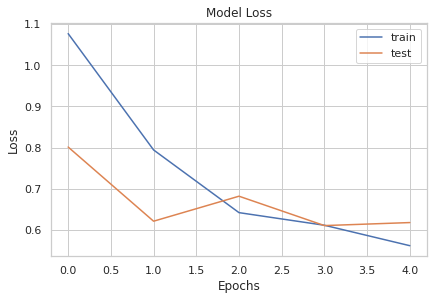

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

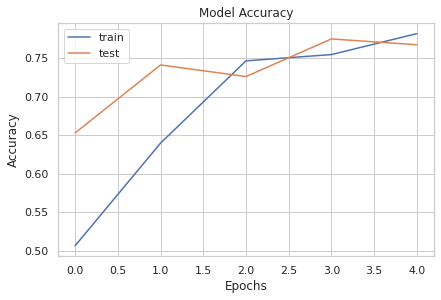

In [34]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [36]:

# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)


In [37]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

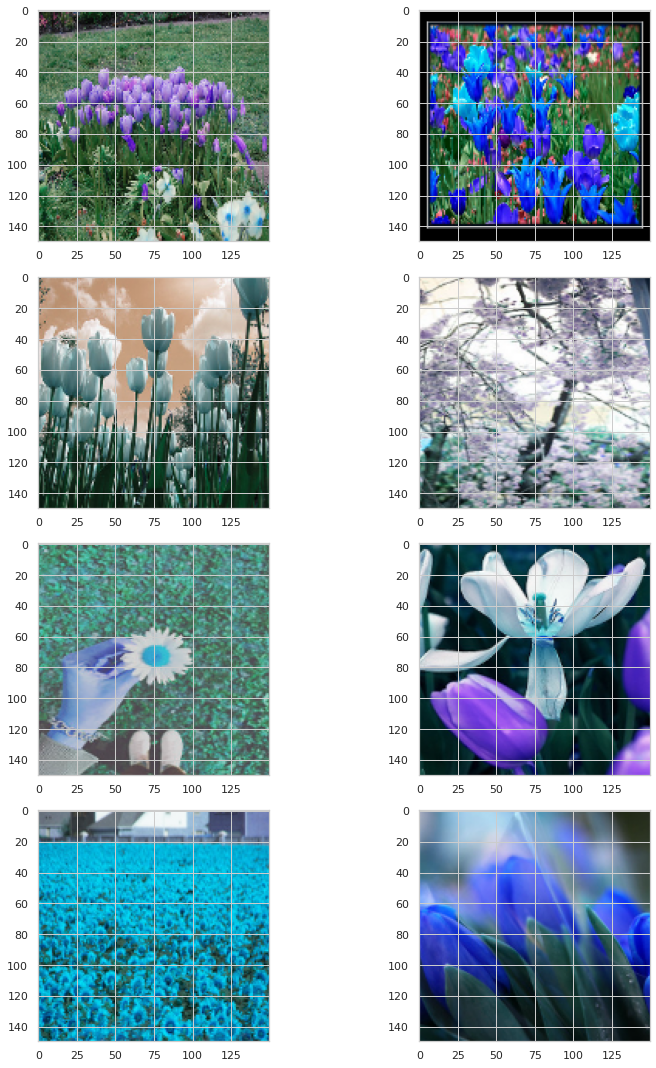

In [39]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        plt.tight_layout()
        count+=1

